## Stakeholder: Real Estate Agency seeking a model to determine price of homes.

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#Disabling pretty printing
%pprint

Pretty printing has been turned OFF


In [3]:
#Loading in original dataset
df_original = pd.read_csv('/Users/Arsh/Documents/GitHub/dsc-phase-2-project-v2-3/data/kc_house_data.csv')

### Viewing the data

In [4]:
#Checking the data
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#Checking NA values
df_original.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#checking the data
df_original.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Cleaning the data

In [7]:
#Making a copy to preserve original dataframe for point of reference
from copy import deepcopy
df = deepcopy(df_original)

In [8]:
#Sanity check
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
#Dropping NAN values from view so we can encode the ordinal values 
df.dropna(subset=['view'], inplace = True)

### Some data is catagorical, converting using OrdinalEncoder

In [10]:
# Selecting columns to convert
ord_cat_selector = ['condition', 'grade', 'view']
cat_subset = df[ord_cat_selector]
cat_subset

,condition,grade,view
0,Average,7 Average,NONE
1,Average,7 Average,NONE
2,Average,6 Low Average,NONE
3,Very Good,7 Average,NONE
4,Average,8 Good,NONE
...,...,...,...
21592,Average,8 Good,NONE
21593,Average,8 Good,NONE
21594,Average,7 Average,NONE
21595,Average,8 Good,NONE


In [11]:
print(cat_subset['condition'].unique())
print(cat_subset['grade'].unique())
print(cat_subset['view'].unique())

['Average' 'Very Good' 'Good' 'Poor' 'Fair']
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [12]:
# Ordering the items
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
grade_list = ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
              '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [13]:
o_enc = OrdinalEncoder(categories = [condition_list, grade_list, view_list])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['3 Poor', '4 Low', '5 Fair', '6 Low Average',
                            '7 Average', '8 Good', '9 Better', '10 Very Good',
                            '11 Excellent', '12 Luxury', '13 Mansion'],
                           ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']])

In [14]:
#create dataframe of ordinal data
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset

,condition,grade,view
0,2.0,4.0,0.0
1,2.0,4.0,0.0
2,2.0,3.0,0.0
3,4.0,4.0,0.0
4,2.0,5.0,0.0
...,...,...,...
21529,2.0,5.0,0.0
21530,2.0,5.0,0.0
21531,2.0,4.0,0.0
21532,2.0,5.0,0.0


In [15]:
#input ordinal data into df
df['cond_num'] = X_subset['condition']
df['grade_num'] = X_subset['grade']
df['view_num'] = X_subset['view']

In [16]:
#Sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   17704 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [17]:
print(df['cond_num'].value_counts())
print(df['grade_num'].value_counts())
print(df['view_num'].value_counts())

2.0    13942
3.0     5639
4.0     1693
1.0      169
0.0       29
Name: cond_num, dtype: int64
4.0     8924
5.0     6041
6.0     2594
3.0     2021
7.0     1128
8.0      395
2.0      242
9.0       87
1.0       26
10.0      13
0.0        1
Name: grade_num, dtype: int64
0.0    19368
2.0      955
3.0      505
1.0      329
4.0      315
Name: view_num, dtype: int64


In [18]:
df['grade_num'] = np.where(df['grade_num'] == 0.0, 1.0, df['grade_num'])
#only 1 value was at 0.0 had to replace for future processing

In [19]:
#Sanity check
print(df['cond_num'].value_counts())
print(df['grade_num'].value_counts())
print(df['view_num'].value_counts())

2.0    13942
3.0     5639
4.0     1693
1.0      169
0.0       29
Name: cond_num, dtype: int64
4.0     8924
5.0     6041
6.0     2594
3.0     2021
7.0     1128
8.0      395
2.0      242
9.0       87
1.0       27
10.0      13
Name: grade_num, dtype: int64
0.0    19368
2.0      955
3.0      505
1.0      329
4.0      315
Name: view_num, dtype: int64


In [20]:
print(df['condition'].value_counts())
print(df['grade'].value_counts())
print(df['view'].value_counts())

Average      13981
Good          5657
Very Good     1697
Fair           170
Poor            29
Name: condition, dtype: int64
7 Average        8948
8 Good           6053
9 Better         2604
6 Low Average    2031
10 Very Good     1130
11 Excellent      397
5 Fair            242
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [21]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   17704 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [22]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
cond_num           62
grade_num          62
view_num           62
dtype: int64

In [23]:
#after too much time, we couldnt discover to source of 62 NAN's appearing. so we drop them
df.dropna(subset=['view_num', 'cond_num', 'grade_num'], inplace = True)

In [24]:
#sanity check
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2359
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3818
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
cond_num            0
grade_num           0
view_num            0
dtype: int64

In [25]:
#The basement datatype should be numeric, however it was an object containing "?"" values. 
df['sqft_basement'] =  df["sqft_basement"].replace("?", np.NaN)
#sanity check
df['sqft_basement'].isna().sum()

451

In [26]:
df.dropna(subset = ["sqft_basement"], inplace = True)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [27]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21021 non-null  int64  
 1   date           21021 non-null  object 
 2   price          21021 non-null  float64
 3   bedrooms       21021 non-null  int64  
 4   bathrooms      21021 non-null  float64
 5   sqft_living    21021 non-null  int64  
 6   sqft_lot       21021 non-null  int64  
 7   floors         21021 non-null  float64
 8   waterfront     18699 non-null  object 
 9   view           21021 non-null  object 
 10  condition      21021 non-null  object 
 11  grade          21021 non-null  object 
 12  sqft_above     21021 non-null  int64  
 13  sqft_basement  21021 non-null  float64
 14  yr_built       21021 non-null  int64  
 15  yr_renovated   17290 non-null  float64
 16  zipcode        21021 non-null  int64  
 17  lat            21021 non-null  float64
 18  long  

In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21021 non-null  int64         
 1   date           21021 non-null  datetime64[ns]
 2   price          21021 non-null  float64       
 3   bedrooms       21021 non-null  int64         
 4   bathrooms      21021 non-null  float64       
 5   sqft_living    21021 non-null  int64         
 6   sqft_lot       21021 non-null  int64         
 7   floors         21021 non-null  float64       
 8   waterfront     18699 non-null  object        
 9   view           21021 non-null  object        
 10  condition      21021 non-null  object        
 11  grade          21021 non-null  object        
 12  sqft_above     21021 non-null  int64         
 13  sqft_basement  21021 non-null  float64       
 14  yr_built       21021 non-null  int64         
 15  yr_renovated   1729

<AxesSubplot:>

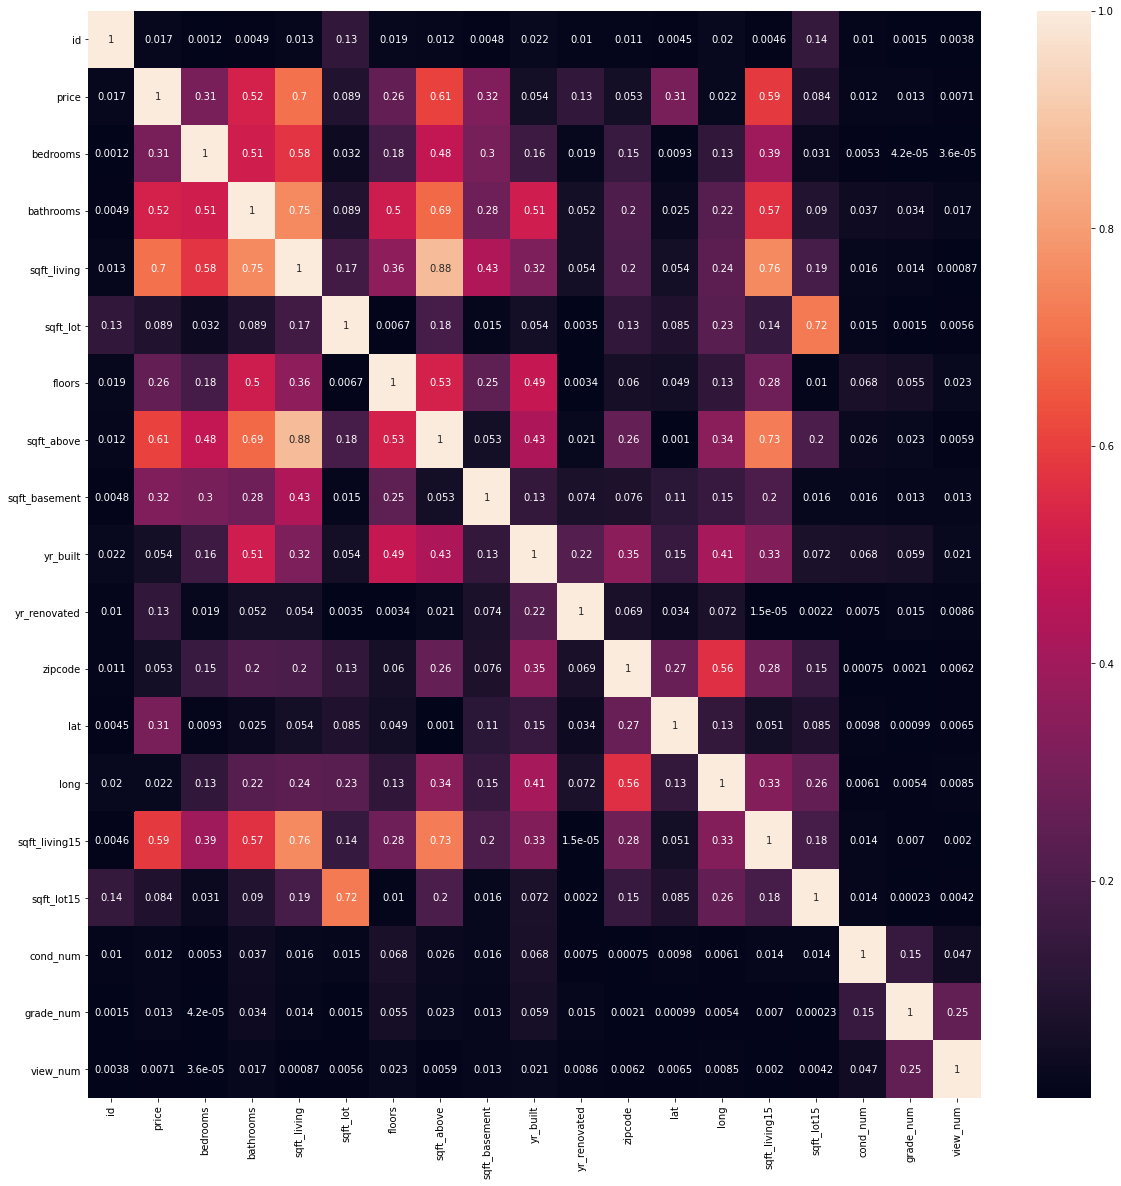

In [30]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr().abs(), annot = True)

In [31]:
#plt.figure(figsize = (20,20))
#sns.pairplot(df, corner = True)

### Prelim Findings from heatmap/correlations

Price has the highest corr with sqft living, followed by bathrooms, sqft living15, bedrooms, floors, lat

Stronng co-linearity with sqft living, sqft above, and sqft basement as sqft living = sqft above + basement. Thus above and basement are somewhat redundant. we will revist after additional columns have been removed/added and data is thoroughly cleaned

Sqft living has the highest corr with bathrooms, price, bedrooms, sqft above, basement, floor

In [32]:
# columns to make, bed/bath, sqft_avg_above/floor, binary basement or no, binary renovated or no, waterfront or no, city or town binary

In [33]:
df = df.drop(columns = ['id', 'date', 'lat', 'long', 'view', 'grade', 'condition'])
#dropping these columns, ID and Date tell us nothing. 
#lat and long are columns we do not plan to use. for neighborhood data we will use zipcode. 
#and view/grade/ condition are now redundent

In [34]:
#sanity check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21021 non-null  float64
 1   bedrooms       21021 non-null  int64  
 2   bathrooms      21021 non-null  float64
 3   sqft_living    21021 non-null  int64  
 4   sqft_lot       21021 non-null  int64  
 5   floors         21021 non-null  float64
 6   waterfront     18699 non-null  object 
 7   sqft_above     21021 non-null  int64  
 8   sqft_basement  21021 non-null  float64
 9   yr_built       21021 non-null  int64  
 10  yr_renovated   17290 non-null  float64
 11  zipcode        21021 non-null  int64  
 12  sqft_living15  21021 non-null  int64  
 13  sqft_lot15     21021 non-null  int64  
 14  cond_num       21021 non-null  float64
 15  grade_num      21021 non-null  float64
 16  view_num       21021 non-null  float64
dtypes: float64(8), int64(8), object(1)
memory usage: 2

In [35]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2322
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3731
zipcode             0
sqft_living15       0
sqft_lot15          0
cond_num            0
grade_num           0
view_num            0
dtype: int64

In [36]:
df['bed/bath'] = df['bedrooms'] / df['bathrooms']
df['avg_fl_space'] = df['sqft_above'] / df['floors']

In [37]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21021 non-null  float64
 1   bedrooms       21021 non-null  int64  
 2   bathrooms      21021 non-null  float64
 3   sqft_living    21021 non-null  int64  
 4   sqft_lot       21021 non-null  int64  
 5   floors         21021 non-null  float64
 6   waterfront     18699 non-null  object 
 7   sqft_above     21021 non-null  int64  
 8   sqft_basement  21021 non-null  float64
 9   yr_built       21021 non-null  int64  
 10  yr_renovated   17290 non-null  float64
 11  zipcode        21021 non-null  int64  
 12  sqft_living15  21021 non-null  int64  
 13  sqft_lot15     21021 non-null  int64  
 14  cond_num       21021 non-null  float64
 15  grade_num      21021 non-null  float64
 16  view_num       21021 non-null  float64
 17  bed/bath       21021 non-null  float64
 18  avg_fl

In [38]:
X = df.drop(columns=['price','waterfront', 'yr_renovated'])
y = df['price']

model_1 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1948.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:28:31   Log-Likelihood:            -2.8997e+05
No. Observations:               21021   AIC:                         5.800e+05
Df Residuals:                   21005   BIC:                         5.801e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -7.84e+06   3.41e+06     -2.301      0.021   -1.45e+07   -1.16e+06
bedrooms      -1.356e+05   3903.452    -34.728      0.000   -1.43e+05   -1.28e+05
bathrooms      1.914e+05   6848.044     27.943      0.000    1.78e+05    2.05e+05
sqft_living     141.8017      3.236     43.817      0.000     135.459     148.145
sqft_lot         -0.0237      0.057     -0.414      0.679      -0.136       0.089
floors         1.249e+05   8391.467     14.881      0.000    1.08e+05    1.41e+05
sqft_above       35.9547      4.530      7.937      0.000      27.076      44.834
sqft_basement   105.8348      3.518     30.082      0.000      98.939     112.731
yr_built      -3479.0973     75.148    -46.297      0.000   -3626.393   -3331.802
zipcode         144.1686     34.296      4.204      0.000      76.946     211.391
sqft_living15   105.0662      3.837     27.382      0.000      97.545     112.587
sqft_lot15       -0.6713      0.088     -7.666      0.000      -0.843      -0.500
cond_num      -3260.6439   2556.368     -1.275      0.202   -8271.322    1750.034
grade_num      2623.8912   1464.916      1.791      0.073    -247.456    5495.238
view_num       1934.4735   2215.605      0.873      0.383   -2408.284    6277.231
bed/bath       1.366e+05   6205.943     22.011      0.000    1.24e+05    1.49e+05
avg_fl_space    104.8546     10.516      9.971      0.000      84.242     125.467
==============================================================================
Omnibus:                    14256.444   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           594535.416
Skew:                           2.729   Prob(JB):                         0.00
Kurtosis:                      28.475   Cond. No.                     1.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.24e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
df.dropna(subset = ['yr_renovated'], inplace = True)
df['renovate_bool'] = np.where(df['yr_renovated'] > 0.0, 1.0, df['yr_renovated']) 
df['renovate_bool'] = df['renovate_bool'].astype(int)
df['renovate_bool'] = df['renovate_bool'].astype(int)

In [40]:
df.dropna(subset = ['waterfront'], inplace = True)
df['water_bool'] = df['waterfront'].str.replace("NO", "0")
df['water_bool'] = df['water_bool'].str.replace("YES", "1")
df['water_bool'] = df['water_bool'].astype(int)

In [41]:
df['base_bool'] = np.where(df['sqft_basement'] > 0.0, 1.0, df['sqft_basement'])
df['base_bool'] = df['base_bool'].astype(int)

In [42]:
df.bedrooms = df.bedrooms.astype(int)
df.cond_num = df.cond_num.astype(int)
df.grade_num = df.grade_num.astype(int)
df.view_num = df.view_num.astype(int)
df.yr_built = df.yr_built.astype(int)
df.yr_renovated = df.yr_renovated.astype(int)
df.renovate_bool = df.renovate_bool.astype(int)
df.base_bool = df.base_bool.astype(int)
df.water_bool = df.water_bool.astype(int)
df.price=df.price.astype(float)
df.bedrooms=df.bedrooms.astype(float)
df.floors=df.floors.astype(float)
df['bed/bath']=df['bed/bath'].astype(float)
df.avg_fl_space=df.avg_fl_space.astype(float)
df.sqft_living=df.sqft_living.astype(float)
df.sqft_living15=df.sqft_living15.astype(float)
df.sqft_lot=df.sqft_lot.astype(float)
df.sqft_lot15=df.sqft_lot15.astype(float)
df.sqft_above=df.sqft_above.astype(float)
df.sqft_basement=df.sqft_basement.astype(float)

In [43]:
X = df.drop(columns=['price','waterfront', 'yr_renovated'])
y = df['price']
#repeating the model with waterfront as a boolean included.
model_2 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1365.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:28:31   Log-Likelihood:            -2.1190e+05
No. Observations:               15390   AIC:                         4.238e+05
Df Residuals:                   15371   BIC:                         4.240e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.967e+06   3.91e+06     -1.269      0.204   -1.26e+07     2.7e+06
bedrooms      -1.277e+05   4461.355    -28.615      0.000   -1.36e+05   -1.19e+05
bathrooms      1.834e+05   7836.252     23.398      0.000    1.68e+05    1.99e+05
sqft_living     133.1550      4.125     32.280      0.000     125.070     141.240
sqft_lot         -0.0439      0.064     -0.687      0.492      -0.169       0.081
floors         1.109e+05   9660.340     11.483      0.000     9.2e+04     1.3e+05
sqft_above       61.9341      5.630     11.000      0.000      50.898      72.971
sqft_basement    71.2244      5.735     12.419      0.000      59.983      82.466
yr_built      -3309.4353     89.129    -37.131      0.000   -3484.139   -3134.732
zipcode         111.5584     39.383      2.833      0.005      34.362     188.755
sqft_living15    92.3216      4.395     21.004      0.000      83.706     100.937
sqft_lot15       -0.6322      0.097     -6.510      0.000      -0.822      -0.442
cond_num      -2572.5900   2918.225     -0.882      0.378   -8292.656    3147.475
grade_num      3285.8449   1680.137      1.956      0.051      -7.423    6579.113
view_num        193.3271   2513.950      0.077      0.939   -4734.312    5120.966
bed/bath       1.342e+05   7129.669     18.816      0.000     1.2e+05    1.48e+05
avg_fl_space     93.7872     12.058      7.778      0.000      70.152     117.422
renovate_bool  3.156e+04   9874.420      3.196      0.001    1.22e+04    5.09e+04
water_bool     7.232e+05    2.2e+04     32.860      0.000     6.8e+05    7.66e+05
base_bool      3.985e+04   7131.448      5.588      0.000    2.59e+04    5.38e+04
==============================================================================
Omnibus:                     9863.961   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           419783.142
Skew:                           2.492   Prob(JB):                         0.00
Kurtosis:                      28.096   Cond. No.                     6.79e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.38e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Viewing the P vales, we can conclude that sqft_lot as well as our derived ordinal columns have no substantial impact on our R2

In [44]:
#we dropped all the rows that have NaNs as we beleive we have enough datapoints to run ours models.
df = df.dropna()
df.isna().sum()
df.shape

(15390, 22)

In [45]:
#loading in zipcode data
zipcodes = pd.read_csv("/Users/Arsh/Documents/GitHub/Phase_2_Project/zipcodes.csv")
zipcodes['Population'] = zipcodes['Population'].str.replace(",","")
zipcodes['Population'] = zipcodes['Population'].astype(int)
zipcodes['ZIP Code'] = zipcodes['ZIP Code'].str[-6:].astype(int)
zipcodes.drop(columns = ['Unnamed: 0', 'Timezone', 'Classification', "Area Code(s)"], inplace = True)
zipcodes.rename(columns={"ZIP Code": "zipcode"}, inplace = True)
zipcodes.head()

,zipcode,City,Population
0,98001,Auburn,31911
1,98002,Auburn,31647
2,98003,Federal Way,44151
3,98004,Bellevue,27946
4,98005,Bellevue,17714


In [46]:
#mergeing into main dataframe
df = df.merge(zipcodes, on='zipcode', how='left')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,cond_num,grade_num,view_num,bed/bath,avg_fl_space,renovate_bool,water_bool,base_bool,City,Population
0,538000.0,3.0,2.25,2570.0,7242.0,2.0,NO,2170.0,400.0,1951,...,2,4,0,1.333333,1085.0,1,0,1,Seattle,37081
1,604000.0,4.0,3.00,1960.0,5000.0,1.0,NO,1050.0,910.0,1965,...,4,4,0,1.333333,1050.0,0,0,1,Seattle,14770
2,510000.0,3.0,2.00,1680.0,8080.0,1.0,NO,1680.0,0.0,1987,...,2,5,0,1.500000,1680.0,0,0,0,Sammamish,25748
3,1230000.0,4.0,4.50,5420.0,101930.0,1.0,NO,3890.0,1530.0,2001,...,2,8,0,0.888889,3890.0,0,0,1,Redmond,18784
4,229500.0,3.0,1.00,1780.0,7470.0,1.0,NO,1050.0,730.0,1960,...,2,4,0,3.000000,1050.0,0,0,1,Seattle,25922


In [47]:
#creating dummies for the catagorical nominal data of cities. 
X_city = pd.get_dummies(df['City'], drop_first = True)

df_cities = pd.concat([df, X_city], axis = 1)
df_cities.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,538000.0,3.0,2.25,2570.0,7242.0,2.0,NO,2170.0,400.0,1951,...,0,0,0,0,0,0,1,0,0,0
1,604000.0,4.0,3.00,1960.0,5000.0,1.0,NO,1050.0,910.0,1965,...,0,0,0,0,0,0,1,0,0,0
2,510000.0,3.0,2.00,1680.0,8080.0,1.0,NO,1680.0,0.0,1987,...,0,0,0,0,0,1,0,0,0,0
3,1230000.0,4.0,4.50,5420.0,101930.0,1.0,NO,3890.0,1530.0,2001,...,0,0,0,1,0,0,0,0,0,0
4,229500.0,3.0,1.00,1780.0,7470.0,1.0,NO,1050.0,730.0,1960,...,0,0,0,0,0,0,1,0,0,0


In [48]:
#creating dummies for the catagorical nominal data of cities. 
X_zip = pd.get_dummies(df['zipcode'], drop_first = True)

df_zip = pd.concat([df, X_zip], axis = 1)
df_zip.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,538000.0,3.0,2.25,2570.0,7242.0,2.0,NO,2170.0,400.0,1951,...,0,0,0,0,0,0,0,0,0,0
1,604000.0,4.0,3.00,1960.0,5000.0,1.0,NO,1050.0,910.0,1965,...,0,0,0,0,0,0,0,0,0,0
2,510000.0,3.0,2.00,1680.0,8080.0,1.0,NO,1680.0,0.0,1987,...,0,0,0,0,0,0,0,0,0,0
3,1230000.0,4.0,4.50,5420.0,101930.0,1.0,NO,3890.0,1530.0,2001,...,0,0,0,0,0,0,0,0,0,0
4,229500.0,3.0,1.00,1780.0,7470.0,1.0,NO,1050.0,730.0,1960,...,1,0,0,0,0,0,0,0,0,0


In [49]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15390 entries, 0 to 15389
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15390 non-null  float64
 1   bedrooms       15390 non-null  float64
 2   bathrooms      15390 non-null  float64
 3   sqft_living    15390 non-null  float64
 4   sqft_lot       15390 non-null  float64
 5   floors         15390 non-null  float64
 6   waterfront     15390 non-null  object 
 7   sqft_above     15390 non-null  float64
 8   sqft_basement  15390 non-null  float64
 9   yr_built       15390 non-null  int64  
 10  yr_renovated   15390 non-null  int64  
 11  zipcode        15390 non-null  int64  
 12  sqft_living15  15390 non-null  float64
 13  sqft_lot15     15390 non-null  float64
 14  cond_num       15390 non-null  int64  
 15  grade_num      15390 non-null  int64  
 16  view_num       15390 non-null  int64  
 17  bed/bath       15390 non-null  float64
 18  avg_fl

In [50]:
not_included = ['price','waterfront', 'yr_renovated', 'City']

X = df_cities.drop(columns= not_included)
y = df_cities['price']
#repeating the model with cities as dummies
model_3 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     948.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:28:31   Log-Likelihood:            -2.0940e+05
No. Observations:               15390   AIC:                         4.189e+05
Df Residuals:                   15347   BIC:                         4.192e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.029e+08   8.05e+06     25.207      0.000    1.87e+08    2.19e+08
bedrooms      -1.016e+05   3826.684    -26.557      0.000   -1.09e+05   -9.41e+04
bathrooms      1.442e+05   6705.607     21.506      0.000    1.31e+05    1.57e+05
sqft_living     143.9875      3.520     40.904      0.000     137.088     150.887
sqft_lot          0.1847      0.055      3.369      0.001       0.077       0.292
floors         6286.6830   8490.880      0.740      0.459   -1.04e+04    2.29e+04
sqft_above      101.6365      4.860     20.912      0.000      92.110     111.163
sqft_basement    42.3510      4.923      8.603      0.000      32.702      52.000
yr_built      -1557.7737     83.475    -18.661      0.000   -1721.395   -1394.152
zipcode       -2042.5208     82.399    -24.788      0.000   -2204.033   -1881.008
sqft_living15    75.1305      3.914     19.196      0.000      67.459      82.802
sqft_lot15       -0.2105      0.085     -2.477      0.013      -0.377      -0.044
cond_num       -930.2811   2484.990     -0.374      0.708   -5801.156    3940.593
grade_num       999.7123   1431.056      0.699      0.485   -1805.327    3804.752
view_num       -714.0646   2139.721     -0.334      0.739   -4908.172    3480.043
bed/bath       1.049e+05   6092.245     17.218      0.000     9.3e+04    1.17e+05
avg_fl_space     -3.7966     10.397     -0.365      0.715     -24.177      16.583
renovate_bool  3.529e+04   8431.652      4.186      0.000    1.88e+04    5.18e+04
water_bool     7.569e+05   1.91e+04     39.644      0.000    7.19e+05    7.94e+05
base_bool      6232.6506   6139.123      1.015      0.310   -5800.759    1.83e+04
Population       -0.9991      0.195     -5.111      0.000      -1.382      -0.616
Bellevue       3.146e+05   1.06e+04     29.708      0.000    2.94e+05    3.35e+05
Black Diamond -2.621e+04    2.6e+04     -1.008      0.313   -7.72e+04    2.47e+04
Bothell        4.176e+04   1.88e+04      2.225      0.026    4963.934    7.86e+04
Carnation      1.251e+04   2.32e+04      0.539      0.590    -3.3e+04     5.8e+04
Duvall        -4876.2731   1.99e+04     -0.245      0.807   -4.39e+04    3.41e+04
Enumclaw      -1.187e+04   1.75e+04     -0.677      0.498   -4.62e+04    2.25e+04
Fall City       6.99e+04   2.79e+04      2.507      0.012    1.52e+04    1.25e+05
Federal Way   -3.936e+04   1.16e+04     -3.390      0.001   -6.21e+04   -1.66e+04
Issaquah       1.431e+05   1.18e+04     12.131      0.000     1.2e+05    1.66e+05
Kenmore        8.019e+04    1.6e+04      5.005      0.000    4.88e+04    1.12e+05
Kent           1.324e+04   1.02e+04      1.297      0.195   -6777.244    3.33e+04
Kirkland       2.809e+05   1.08e+04     26.069      0.000     2.6e+05    3.02e+05
Maple Valley   2.228e+04   1.24e+04      1.801      0.072   -1970.160    4.65e+04
Medina         1.204e+06    3.5e+04     34.371   

In [51]:
not_included = ['price','waterfront', 'yr_renovated', 'City']

X = df_zip.drop(columns= not_included)
y = df_zip['price']
#repeating the model with cities as dummies
model_4 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     682.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:28:31   Log-Likelihood:            -2.0713e+05
No. Observations:               15390   AIC:                         4.144e+05
Df Residuals:                   15303   BIC:                         4.151e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9944.2933    510.617    -19.475      0.000   -1.09e+04   -8943.424
bedrooms      -9.168e+04   3324.203    -27.580      0.000   -9.82e+04   -8.52e+04
bathrooms      1.326e+05   5811.128     22.811      0.000    1.21e+05    1.44e+05
sqft_living     158.6266      3.077     51.553      0.000     152.595     164.658
sqft_lot          0.2529      0.047      5.338      0.000       0.160       0.346
floors        -9.105e+04   7632.908    -11.929      0.000   -1.06e+05   -7.61e+04
sqft_above      120.5667      4.258     28.317      0.000     112.221     128.912
sqft_basement    38.0599      4.273      8.907      0.000      29.684      46.436
yr_built       -340.4225     75.674     -4.499      0.000    -488.753    -192.092
zipcode           7.2685      1.478      4.917      0.000       4.371      10.166
sqft_living15    52.4839      3.456     15.186      0.000      45.710      59.258
sqft_lot15       -0.0891      0.074     -1.208      0.227      -0.234       0.055
cond_num       1263.5675   2148.712      0.588      0.557   -2948.164    5475.299
grade_num      1341.4129   1237.758      1.084      0.278   -1084.740    3767.566
view_num      -1235.2439   1850.270     -0.668      0.504   -4861.994    2391.506
bed/bath       1.061e+05   5284.616     20.082      0.000    9.58e+04    1.16e+05
avg_fl_space    -63.2795      9.158     -6.910      0.000     -81.230     -45.329
renovate_bool  3.687e+04   7316.714      5.040      0.000    2.25e+04    5.12e+04
water_bool     8.376e+05   1.66e+04     50.470      0.000    8.05e+05     8.7e+05
base_bool     -3.053e+04   5369.326     -5.686      0.000   -4.11e+04      -2e+04
Population       -9.6105      0.388    -24.761      0.000     -10.371      -8.850
98002          2.396e+04   1.76e+04      1.360      0.174   -1.06e+04    5.85e+04
98003          1.227e+05    1.9e+04      6.448      0.000    8.54e+04     1.6e+05
98004          7.522e+05   1.49e+04     50.569      0.000    7.23e+05    7.81e+05
98005          1.966e+05   1.62e+04     12.142      0.000    1.65e+05    2.28e+05
98006          3.496e+05   1.55e+04     22.495      0.000    3.19e+05     3.8e+05
98007          2.036e+05   1.89e+04     10.760      0.000    1.66e+05    2.41e+05
98008          2.114e+05   1.44e+04     14.721      0.000    1.83e+05     2.4e+05
98010         -1.984e+05   1.98e+04    -10.035      0.000   -2.37e+05    -1.6e+05
98011          8.849e+04   1.76e+04      5.023      0.000     5.4e+04    1.23e+05
98014         -1.631e+05   1.76e+04     -9.251      0.000   -1.98e+05   -1.29e+05
98019         -1.469e+05   1.54e+04     -9.558      0.000   -1.77e+05   -1.17e+05
98022         -8.294e+04    1.5e+04     -5.529      0.000   -1.12e+05   -5.35e+04
98023          1.333e+05   1.86e+04      7.154      0.000    9.68e+04     1.7e+05
98024         -1.265e+05   2.15e+04     -5.879   

In [52]:
df_all = pd.concat([df_zip, X_city], axis = 1)
df_all.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,538000.0,3.0,2.25,2570.0,7242.0,2.0,NO,2170.0,400.0,1951,...,0,0,0,0,0,0,1,0,0,0
1,604000.0,4.0,3.00,1960.0,5000.0,1.0,NO,1050.0,910.0,1965,...,0,0,0,0,0,0,1,0,0,0
2,510000.0,3.0,2.00,1680.0,8080.0,1.0,NO,1680.0,0.0,1987,...,0,0,0,0,0,1,0,0,0,0
3,1230000.0,4.0,4.50,5420.0,101930.0,1.0,NO,3890.0,1530.0,2001,...,0,0,0,1,0,0,0,0,0,0
4,229500.0,3.0,1.00,1780.0,7470.0,1.0,NO,1050.0,730.0,1960,...,0,0,0,0,0,0,1,0,0,0


In [53]:
not_included = ['price','waterfront', 'yr_renovated', 'City', 'cond_num', 'grade_num', 'view_num', 'sqft_lot15']

X = df_zip.drop(columns= not_included)
y = df_zip['price']
#repeating the model with cities as dummies
model_5 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     715.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:28:32   Log-Likelihood:            -2.0713e+05
No. Observations:               15390   AIC:                         4.144e+05
Df Residuals:                   15307   BIC:                         4.151e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9944.3267    510.500    -19.480      0.000   -1.09e+04   -8943.685
bedrooms      -9.159e+04   3322.801    -27.565      0.000   -9.81e+04   -8.51e+04
bathrooms      1.326e+05   5810.006     22.821      0.000    1.21e+05    1.44e+05
sqft_living     158.5274      3.076     51.545      0.000     152.499     164.556
sqft_lot          0.2162      0.036      5.993      0.000       0.145       0.287
floors        -9.093e+04   7631.132    -11.916      0.000   -1.06e+05    -7.6e+04
sqft_above      120.5601      4.257     28.318      0.000     112.215     128.905
sqft_basement    37.9672      4.272      8.887      0.000      29.593      46.341
yr_built       -337.5860     75.513     -4.471      0.000    -485.600    -189.572
zipcode           7.2939      1.474      4.950      0.000       4.406      10.182
sqft_living15    52.2084      3.450     15.133      0.000      45.446      58.971
bed/bath        1.06e+05   5283.771     20.064      0.000    9.57e+04    1.16e+05
avg_fl_space    -63.3723      9.156     -6.922      0.000     -81.319     -45.426
renovate_bool  3.674e+04   7315.845      5.022      0.000    2.24e+04    5.11e+04
water_bool     8.383e+05   1.66e+04     50.530      0.000    8.06e+05    8.71e+05
base_bool     -3.049e+04   5368.941     -5.679      0.000    -4.1e+04      -2e+04
Population       -9.5771      0.387    -24.721      0.000     -10.336      -8.818
98002           2.39e+04   1.76e+04      1.357      0.175   -1.06e+04    5.84e+04
98003          1.223e+05    1.9e+04      6.426      0.000     8.5e+04     1.6e+05
98004          7.521e+05   1.49e+04     50.580      0.000    7.23e+05    7.81e+05
98005          1.968e+05   1.62e+04     12.160      0.000    1.65e+05    2.29e+05
98006          3.495e+05   1.55e+04     22.494      0.000    3.19e+05     3.8e+05
98007          2.037e+05   1.89e+04     10.768      0.000    1.67e+05    2.41e+05
98008          2.116e+05   1.44e+04     14.738      0.000    1.83e+05     2.4e+05
98010         -1.994e+05   1.98e+04    -10.087      0.000   -2.38e+05   -1.61e+05
98011          8.854e+04   1.76e+04      5.027      0.000     5.4e+04    1.23e+05
98014         -1.648e+05   1.76e+04     -9.367      0.000   -1.99e+05    -1.3e+05
98019         -1.481e+05   1.53e+04     -9.655      0.000   -1.78e+05   -1.18e+05
98022         -8.409e+04    1.5e+04     -5.614      0.000   -1.13e+05   -5.47e+04
98023          1.327e+05   1.86e+04      7.121      0.000    9.62e+04    1.69e+05
98024         -1.285e+05   2.14e+04     -5.994      0.000   -1.71e+05   -8.65e+04
98027          1.109e+05   1.34e+04      8.294      0.000    8.47e+04    1.37e+05
98028          1.142e+04   1.36e+04      0.837      0.402   -1.53e+04    3.81e+04
98029           1.47e+05   1.38e+04     10.672      0.000     1.2e+05    1.74e+05
98030          1.718e+04   1.71e+04      1.007   

In [54]:
lr = LinearRegression()

X = df_zip.drop(columns= not_included)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr.fit(X_train, y_train)
#print(lr.coef_)
#print(X.columns)
print("intercept = ", lr.intercept_)
print('R2 for training = ', lr.score(X_train, y_train))
print('R2 for test = ', lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
MAE = mean_absolute_error(y_pred, y_test)
print("MAE = ", MAE)
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE = ",RMSE)

intercept =  117850719719.23488
R2 for training =  0.7940676785510633
R2 for test =  0.7850994726108211
MAE =  100363.71263110165
RMSE =  184114.84380311033


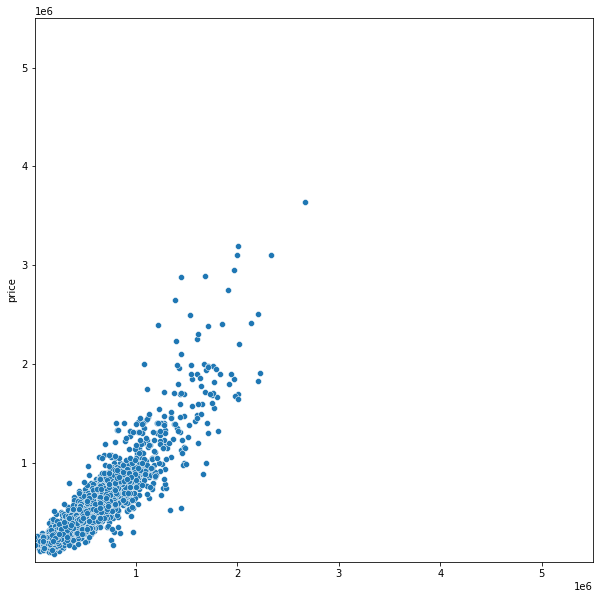

In [55]:
plt.figure(figsize = (10,10))
plt.xlim(1, 5.5e6)
plt.ylim(1,5.5e6)
sns.scatterplot(x = y_pred, y= y_test)
plt.show()

In [56]:
def data_clean(col_name, df2):
    Q1 = df2[col_name].quantile(.25)
    Q3 = df2[col_name].quantile(.75)
    IQR = Q3 - Q1
    out_top = Q3 + IQR
    out_bottom = Q1 - IQR
    df2 = df2[df2[col_name] <= out_top]
    df2 = df2[df2[col_name] >= out_bottom]
    return df2

In [57]:
list(df_zip.columns)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'cond_num', 'grade_num', 'view_num', 'bed/bath', 'avg_fl_space', 'renovate_bool', 'water_bool', 'base_bool', 'City', 'Population', 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]

In [58]:
df_zip= data_clean('bedrooms', df_zip)

In [59]:
not_included = ['price','waterfront', 'City', 'yr_renovated','sqft_lot15', 'cond_num', 'grade_num', 'view_num']
X = df_zip.drop(columns= not_included)
y = df_zip['price']
#repeating the model after removing outlier in bedrooms column
model_6 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     720.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:28:32   Log-Likelihood:            -2.0146e+05
No. Observations:               15025   AIC:                         4.031e+05
Df Residuals:                   14942   BIC:                         4.037e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9947.9965    488.930    -20.346      0.000   -1.09e+04   -8989.634
bedrooms      -8.947e+04   3454.505    -25.900      0.000   -9.62e+04   -8.27e+04
bathrooms      1.279e+05   5788.941     22.099      0.000    1.17e+05    1.39e+05
sqft_living     148.7663      3.068     48.495      0.000     142.753     154.779
sqft_lot          0.2475      0.035      7.160      0.000       0.180       0.315
floors        -7.788e+04   7451.248    -10.451      0.000   -9.25e+04   -6.33e+04
sqft_above      112.3354      4.159     27.009      0.000     104.183     120.488
sqft_basement    36.4309      4.196      8.682      0.000      28.206      44.656
yr_built       -301.7379     73.424     -4.110      0.000    -445.658    -157.818
zipcode           6.4785      1.436      4.512      0.000       3.664       9.293
sqft_living15    55.1348      3.362     16.401      0.000      48.546      61.724
bed/bath       9.867e+04   5278.364     18.694      0.000    8.83e+04    1.09e+05
avg_fl_space    -45.6407      8.960     -5.094      0.000     -63.204     -28.077
renovate_bool  3.293e+04   7132.408      4.617      0.000    1.89e+04    4.69e+04
water_bool      8.53e+05   1.63e+04     52.400      0.000    8.21e+05    8.85e+05
base_bool     -2.671e+04   5237.521     -5.099      0.000    -3.7e+04   -1.64e+04
Population       -9.2676      0.371    -24.958      0.000      -9.995      -8.540
98002          3.052e+04   1.71e+04      1.786      0.074   -2973.148     6.4e+04
98003          1.203e+05   1.82e+04      6.610      0.000    8.46e+04    1.56e+05
98004          7.562e+05   1.43e+04     52.925      0.000    7.28e+05    7.84e+05
98005          2.026e+05   1.55e+04     13.057      0.000    1.72e+05    2.33e+05
98006          3.536e+05   1.49e+04     23.702      0.000    3.24e+05    3.83e+05
98007          2.065e+05   1.85e+04     11.188      0.000     1.7e+05    2.43e+05
98008          2.146e+05   1.38e+04     15.587      0.000    1.88e+05    2.42e+05
98010          -1.94e+05   1.89e+04    -10.243      0.000   -2.31e+05   -1.57e+05
98011          8.991e+04   1.68e+04      5.345      0.000    5.69e+04    1.23e+05
98014          -1.66e+05    1.7e+04     -9.755      0.000   -1.99e+05   -1.33e+05
98019         -1.482e+05   1.49e+04     -9.930      0.000   -1.77e+05   -1.19e+05
98022         -8.671e+04   1.44e+04     -6.021      0.000   -1.15e+05   -5.85e+04
98023          1.284e+05   1.78e+04      7.205      0.000    9.35e+04    1.63e+05
98024         -1.189e+05   2.04e+04     -5.825      0.000   -1.59e+05   -7.89e+04
98027          1.148e+05   1.28e+04      8.953      0.000    8.96e+04     1.4e+05
98028          1.502e+04   1.31e+04      1.150      0.250   -1.06e+04    4.06e+04
98029          1.512e+05   1.31e+04     11.501      0.000    1.25e+05    1.77e+05
98030          1.723e+04   1.63e+04      1.056   

In [60]:
not_included = ['price','waterfront', 'City', 'sqft_lot15', 'cond_num', 'grade_num', 'view_num', 'base_bool', 'renovate_bool', 'floors', 'avg_fl_space', 'sqft_basement', 'sqft_lot', 'Population']
X = df_zip.drop(columns= not_included)
y = df_zip['price']

#repeating the model after removing all poorly weighted variables
model_8 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     742.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:28:32   Log-Likelihood:            -2.0157e+05
No. Observations:               15025   AIC:                         4.033e+05
Df Residuals:                   14946   BIC:                         4.039e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.16e+04    581.222    -19.950      0.000   -1.27e+04   -1.05e+04
bedrooms      -9.299e+04   3453.866    -26.924      0.000   -9.98e+04   -8.62e+04
bathrooms      1.201e+05   5757.217     20.858      0.000    1.09e+05    1.31e+05
sqft_living     180.2573      4.035     44.675      0.000     172.348     188.166
sqft_above       52.4771      3.766     13.936      0.000      45.096      59.858
yr_built       -735.3430     67.032    -10.970      0.000    -866.733    -603.953
yr_renovated     12.7797      3.587      3.563      0.000       5.749      19.810
zipcode          11.1870      1.352      8.273      0.000       8.537      13.837
sqft_living15    57.1864      3.379     16.923      0.000      50.563      63.810
bed/bath       1.023e+05   5278.766     19.373      0.000    9.19e+04    1.13e+05
water_bool      8.45e+05   1.64e+04     51.578      0.000    8.13e+05    8.77e+05
98002          2.945e+04   1.73e+04      1.706      0.088   -4394.267    6.33e+04
98003          5715.1889   1.53e+04      0.374      0.708   -2.42e+04    3.56e+04
98004          7.865e+05   1.53e+04     51.533      0.000    7.57e+05    8.16e+05
98005          3.302e+05    1.8e+04     18.371      0.000    2.95e+05    3.65e+05
98006           3.08e+05   1.38e+04     22.258      0.000    2.81e+05    3.35e+05
98007          2.663e+05   1.98e+04     13.474      0.000    2.28e+05    3.05e+05
98008          2.815e+05   1.54e+04     18.245      0.000    2.51e+05    3.12e+05
98010          6.093e+04   2.25e+04      2.711      0.007    1.69e+04    1.05e+05
98011          1.108e+05   1.75e+04      6.342      0.000    7.66e+04    1.45e+05
98014          9.034e+04   2.03e+04      4.459      0.000    5.06e+04     1.3e+05
98019          4.965e+04   1.82e+04      2.734      0.006     1.4e+04    8.52e+04
98022           3.12e+04   1.64e+04      1.898      0.058   -1013.980    6.34e+04
98023         -1.728e+04   1.35e+04     -1.279      0.201   -4.38e+04    9199.011
98024          1.425e+05   2.38e+04      5.987      0.000    9.59e+04    1.89e+05
98027           1.61e+05   1.42e+04     11.298      0.000    1.33e+05    1.89e+05
98028          1.163e+05   1.54e+04      7.532      0.000     8.6e+04    1.47e+05
98029          2.113e+05   1.49e+04     14.212      0.000    1.82e+05     2.4e+05
98030         -1653.1286    1.6e+04     -0.103      0.918   -3.31e+04    2.98e+04
98031          2.179e+04   1.56e+04      1.395      0.163   -8833.347    5.24e+04
98032          1.614e+04   1.96e+04      0.825      0.409   -2.22e+04    5.45e+04
98033          3.795e+05    1.4e+04     27.158      0.000    3.52e+05    4.07e+05
98034          2.199e+05   1.33e+04     16.509      0.000    1.94e+05    2.46e+05
98038          2.156e+04   1.31e+04      1.644      0.100   -4153.569    4.73e+04
98039          1.205e+06   3.05e+04     39.548   

In [94]:
df_standard = df_zip.drop(columns=['waterfront', 'City', 'yr_built', 'yr_renovated'])
df_standard1 = df_standard.apply(lambda x: (x-x.mean())/ x.std())
df_standard2 = df_standard1.drop(columns=['price'])
df_standard_aug = sm.add_constant(df_standard2)
y_standard = df_standard1['price']
results_standardized = sm.OLS(y_standard, df_standard_aug).fit()

In [95]:
results_standardized.rsquared

0.7978987502657338

In [96]:
results_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     693.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:52:20   Log-Likelihood:                -9306.7
No. Observations:               15025   AIC:                         1.879e+04
Df Residuals:                   14939   BIC:                         1.944e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.008      0.117      0.907      -0.015       0.017
bedrooms         -0.1993      0.009    -23.113      0.000      -0.216      -0.182
bathrooms         0.2584      0.012     21.399      0.000       0.235       0.282
sqft_living    7.294e+10   5.56e+11      0.131      0.896   -1.02e+12    1.16e+12
sqft_lot          0.0346      0.005      6.466      0.000       0.024       0.045
floors           -0.1338      0.010    -12.837      0.000      -0.154      -0.113
sqft_above    -6.666e+10   5.08e+11     -0.131      0.896   -1.06e+12    9.29e+11
sqft_basement  -3.56e+10   2.71e+11     -0.131      0.896   -5.67e+11    4.96e+11
zipcode       -1.447e+10    1.1e+11     -0.131      0.896   -2.31e+11    2.02e+11
sqft_living15     0.1055      0.006     16.473      0.000       0.093       0.118
sqft_lot15       -0.0072      0.006     -1.309      0.191      -0.018       0.004
cond_num          0.0035      0.004      0.946      0.344      -0.004       0.011
grade_num         0.0048      0.004      1.228      0.219      -0.003       0.012
view_num         -0.0013      0.004     -0.350      0.726      -0.009       0.006
bed/bath          0.1776      0.009     18.913      0.000       0.159       0.196
avg_fl_space     -0.0656      0.011     -6.069      0.000      -0.087      -0.044
renovate_bool     0.0224      0.004      5.964      0.000       0.015       0.030
water_bool        0.2016      0.004     52.515      0.000       0.194       0.209
base_bool        -0.0390      0.007     -5.485      0.000      -0.053      -0.025
Population    -2.789e+09   2.13e+10     -0.131      0.896   -4.45e+10    3.89e+10
98002          1.969e+07    1.5e+08      0.131      0.896   -2.74e+08    3.14e+08
98003          4.254e+08   3.24e+09      0.131      0.896   -5.93e+09    6.78e+09
98004         -2.169e+07   1.65e+08     -0.131      0.896   -3.46e+08    3.02e+08
98005         -2.253e+08   1.72e+09     -0.131      0.896   -3.59e+09    3.14e+09
98006          3.689e+08   2.81e+09      0.131      0.896   -5.14e+09    5.88e+09
98007         -1.043e+07   7.95e+07     -0.131      0.896   -1.66e+08    1.45e+08
98008          2.215e+06   1.69e+07      0.131      0.896   -3.09e+07    3.53e+07
98010          -2.86e+08   2.18e+09     -0.131      0.896   -4.56e+09    3.99e+09
98011          1.919e+08   1.46e+09      0.131      0.896   -2.68e+09    3.06e+09
98014         -2.116e+08   1.61e+09     -0.131      0.896   -3.37e+09    2.95e+09
98019         -3.799e+07    2.9e+08     -0.131      0.896   -6.06e+08     5.3e+08
98022          3.071e+08   2.34e+09      0.131      0.896   -4.28e+09    4.89e+09
98023          1.503e+09   1.15e+10      0.131      0.896   -2.09e+10     2.4e+10
98024         -2.124e+07   1.62e+08     -0.131      0.896   -3.39e+08    2.96e+08
98027          7.654e+08   5.83e+09      0.131   

In [97]:
weights = results_standardized.params
weights

const          9.535494e-04
bedrooms      -1.992708e-01
bathrooms      2.583772e-01
sqft_living    7.293703e+10
sqft_lot       3.462543e-02
                   ...     
98177          4.824712e+09
98178          5.046411e+09
98188          3.760797e+09
98198          6.071247e+09
98199          5.967331e+09
Length: 89, dtype: float64

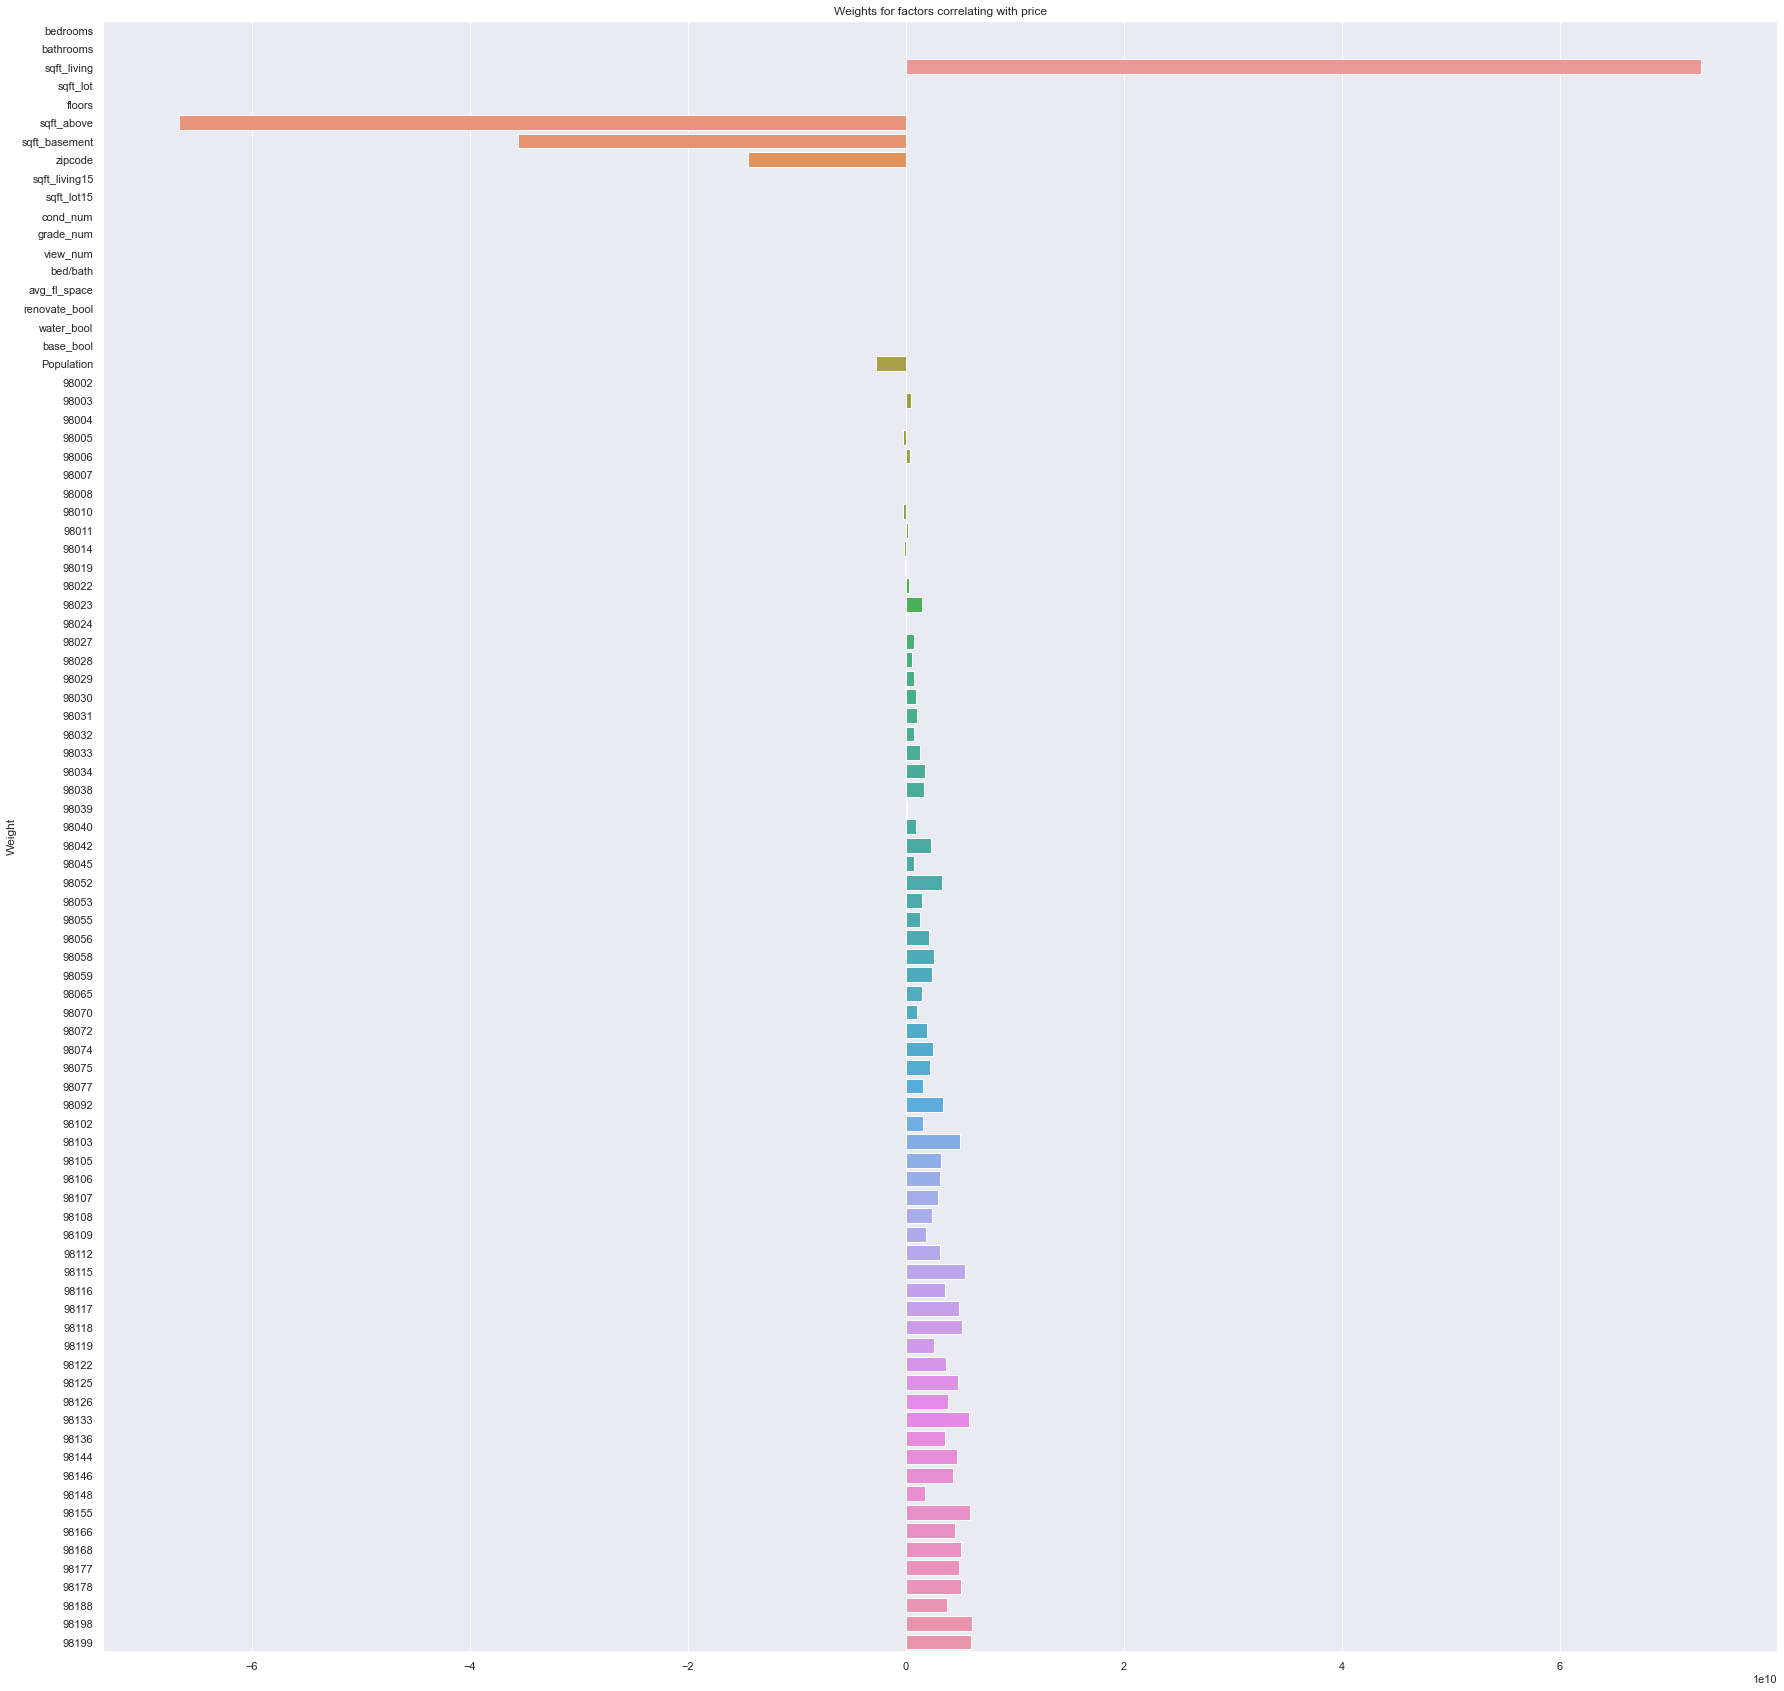

In [100]:
plt.figure(figsize=(30,30))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()

In [64]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'sqft_living15', 'sqft_lot15', 'cond_num', 'grade_num',
       'view_num', 'bed/bath', 'avg_fl_space', 'renovate_bool', 'water_bool',
       'base_bool', 'City', 'Population'],
      dtype='object')

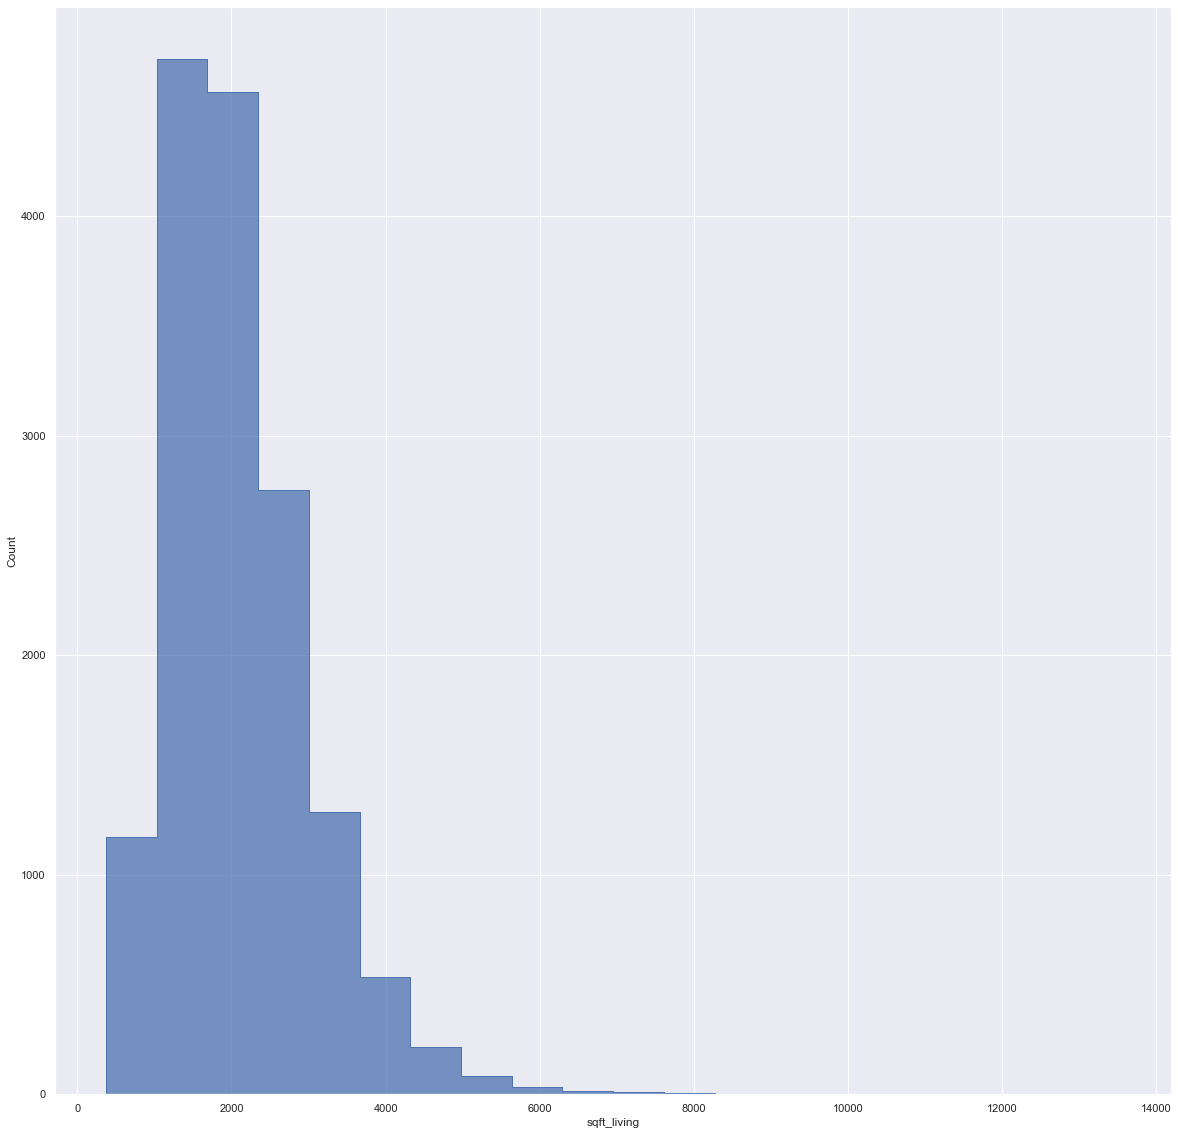

In [65]:
plt.figure(figsize = (20,20))
sns.set(style="darkgrid")
sns.histplot(data=df, x="sqft_living", element='step', bins = 20)
plt.show()
# Looking at distribution of homes by square foot living

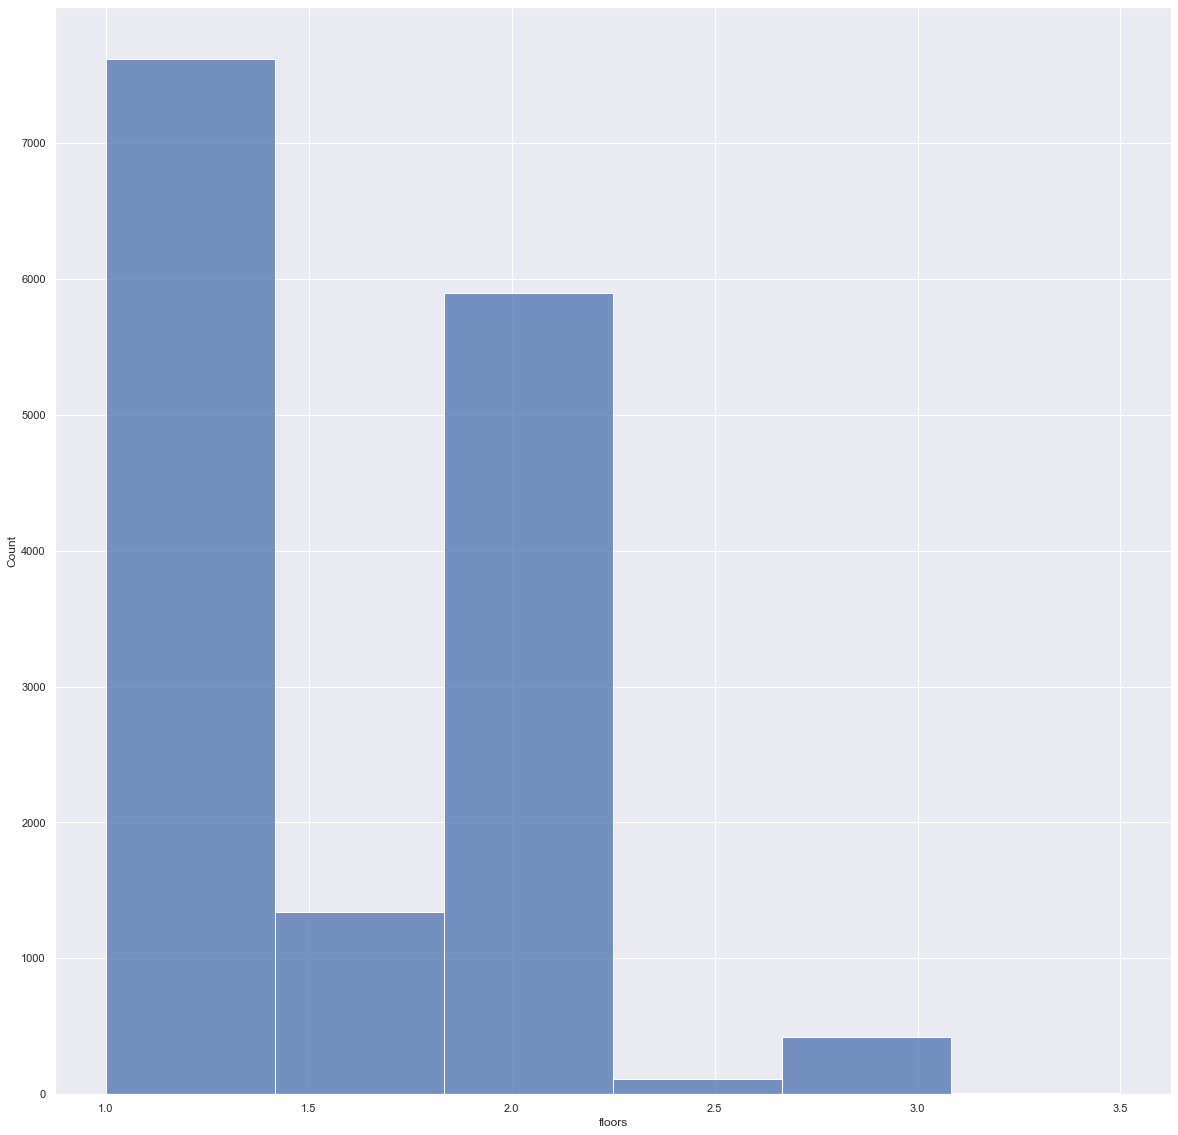

In [66]:
plt.figure(figsize = (20,20))
sns.set(style="darkgrid")
sns.histplot(data=df, x="floors", bins = 6)
plt.show()
# Looking at distribution of homes by floors

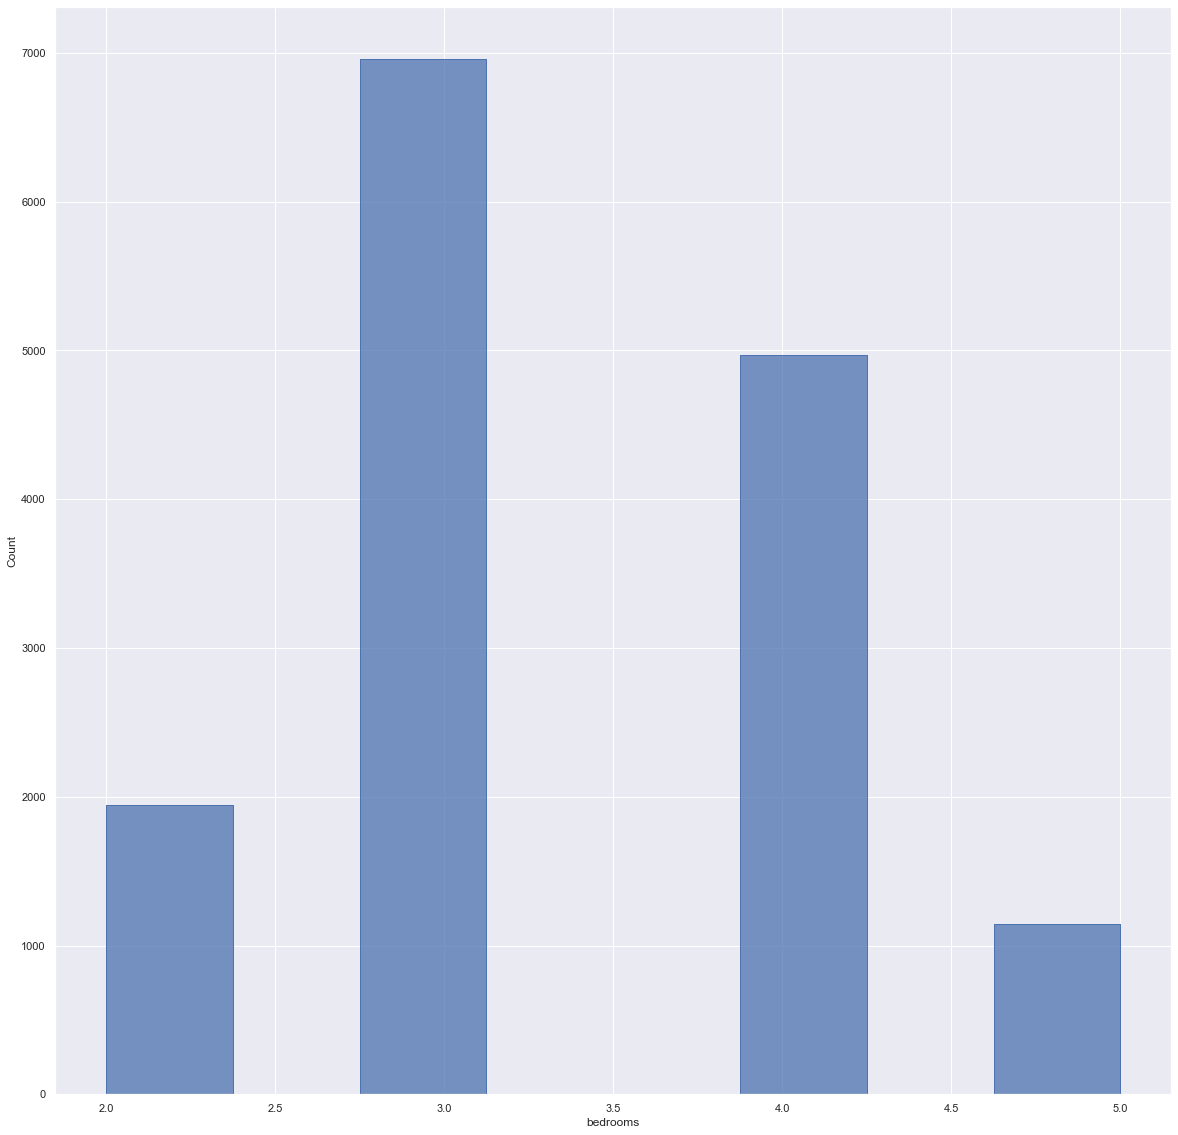

In [67]:
plt.figure(figsize = (20,20))
sns.set(style="darkgrid")
sns.histplot(data=df_zip, x="bedrooms", element='step', bins = 8)
plt.show()
# Looking at distribution of homes by floors

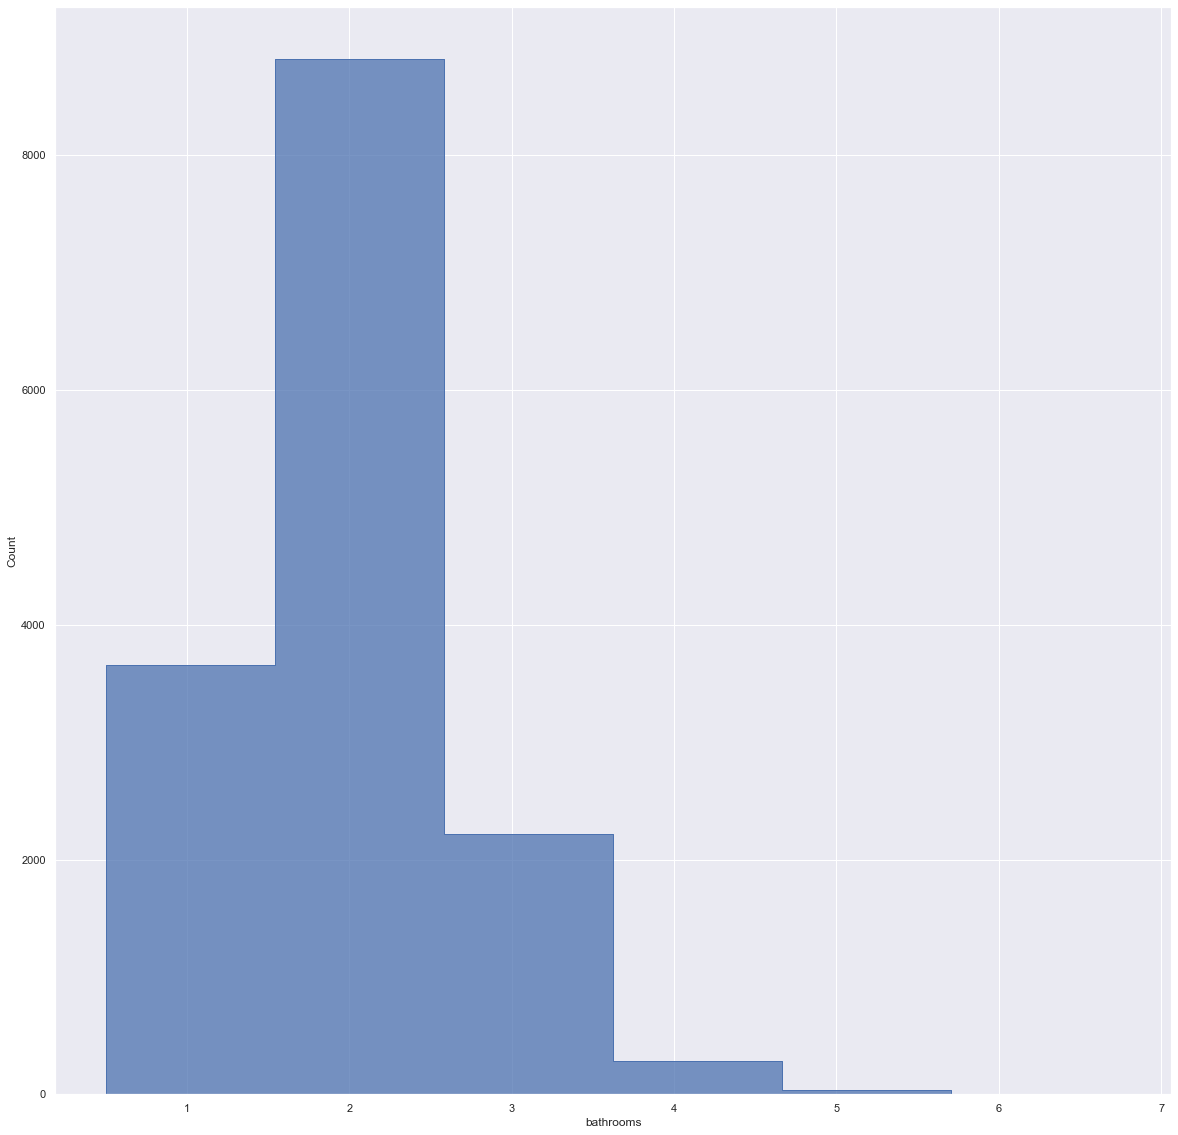

In [68]:
plt.figure(figsize = (20,20))
sns.set(style="darkgrid")
sns.histplot(data=df_zip, x="bathrooms", element='step', bins = 6)
plt.show()
# Looking at distribution of homes by floors

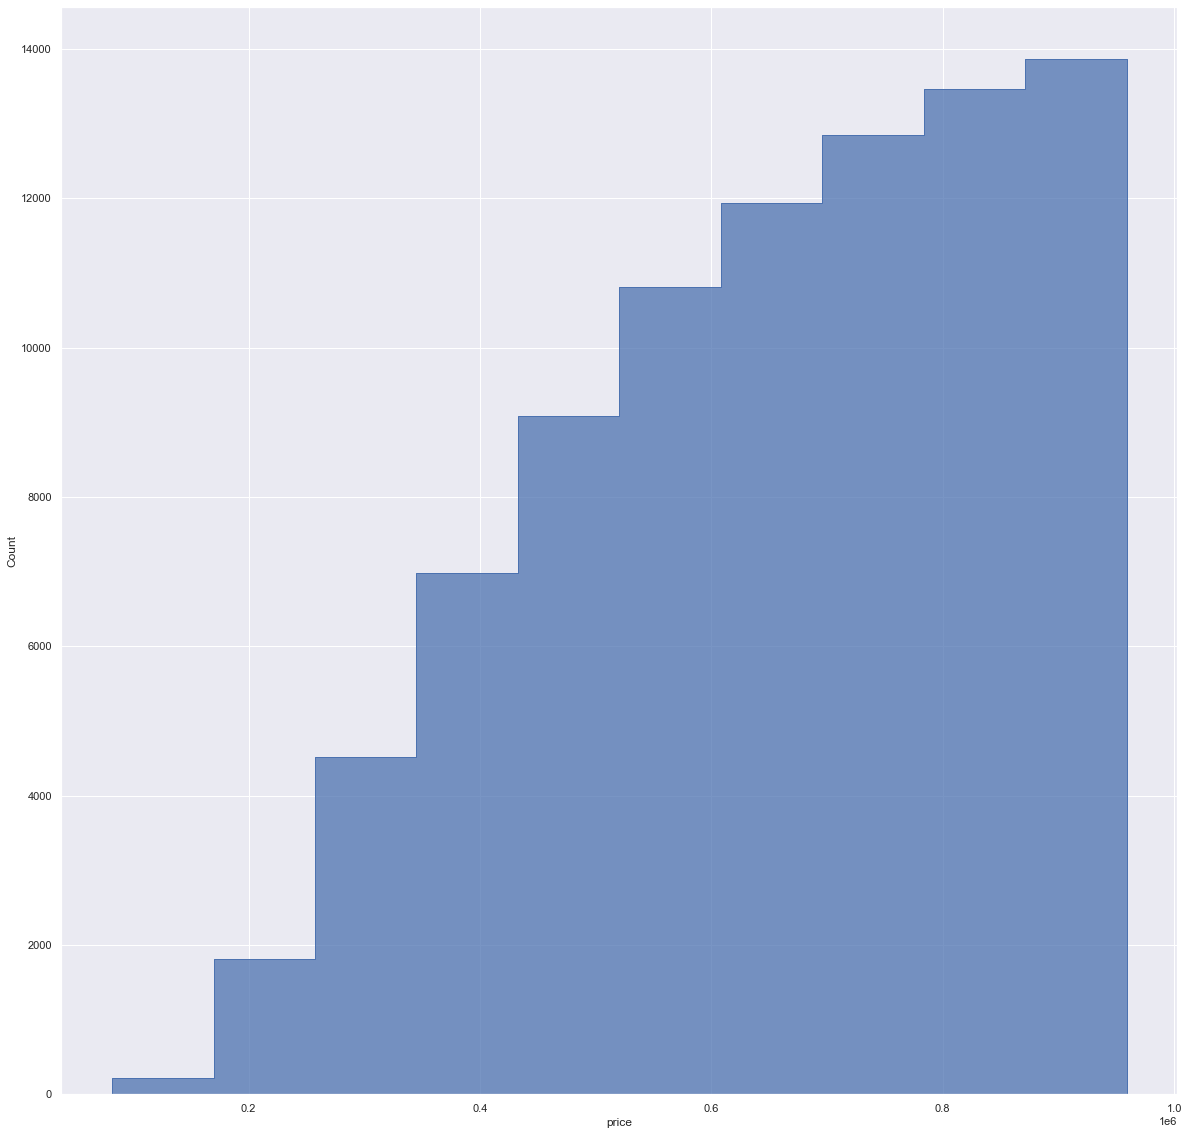

In [69]:
df_zip_no_out = data_clean('price', df_zip)
plt.figure(figsize = (20,20))
sns.set(style="darkgrid")
sns.histplot(data=df_zip_no_out, x="price", element='step', bins = 10, cumulative = True)
plt.show()
# Looking at distribution of homes by floors cumulatively

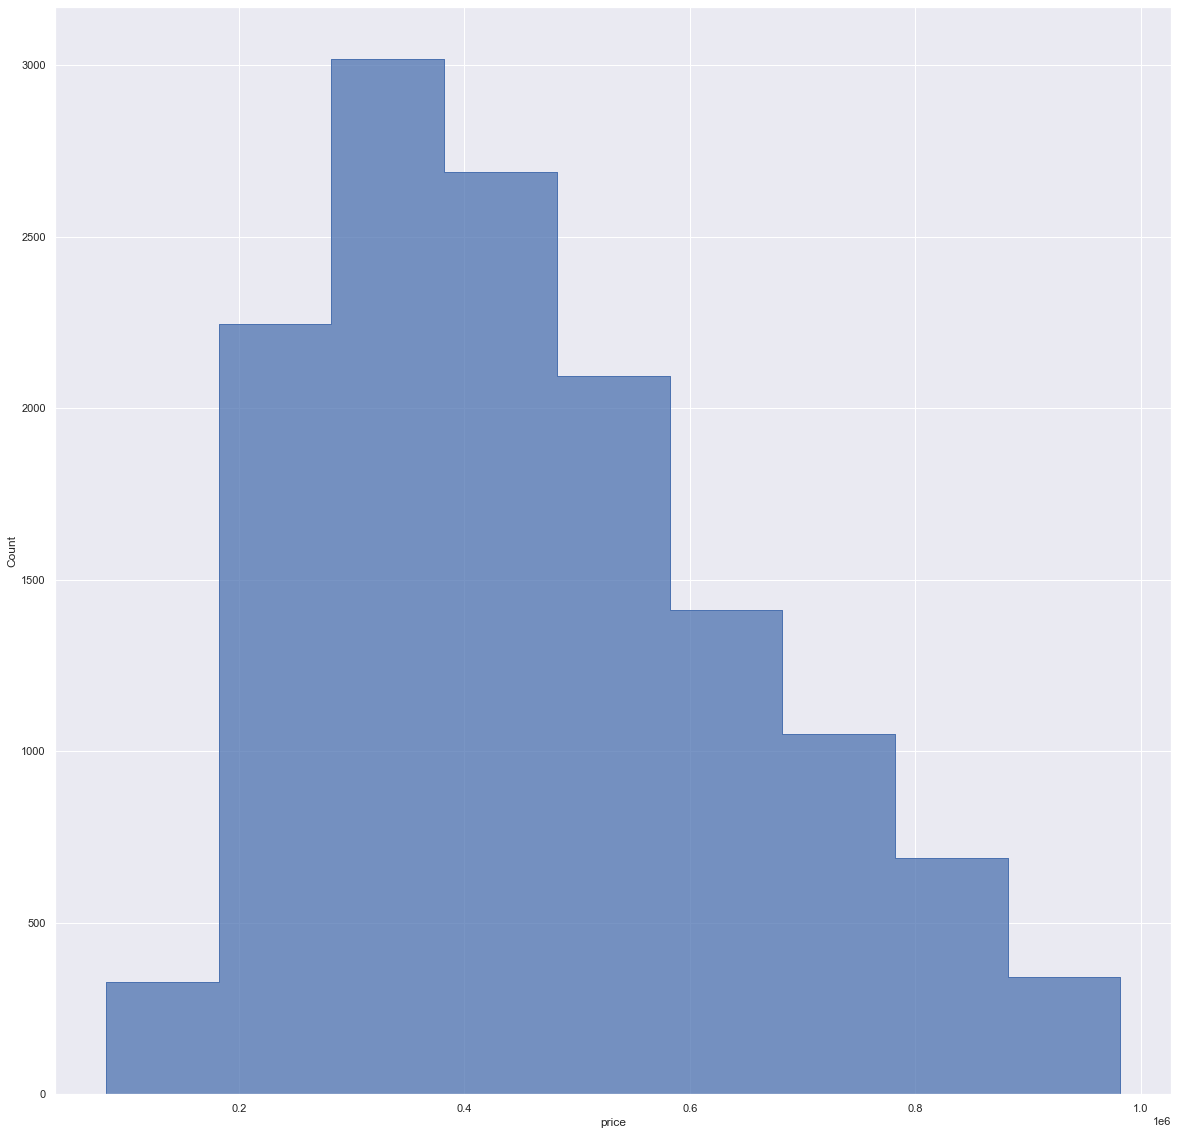

In [70]:
df_zip_no_out = data_clean('price', df_zip)
plt.figure(figsize = (20,20))
sns.set(style="darkgrid")
sns.histplot(data=df_zip_no_out, x="price", element='step', binwidth = 100000)
plt.show()
# Looking at distribution of homes by floors 

<AxesSubplot:>

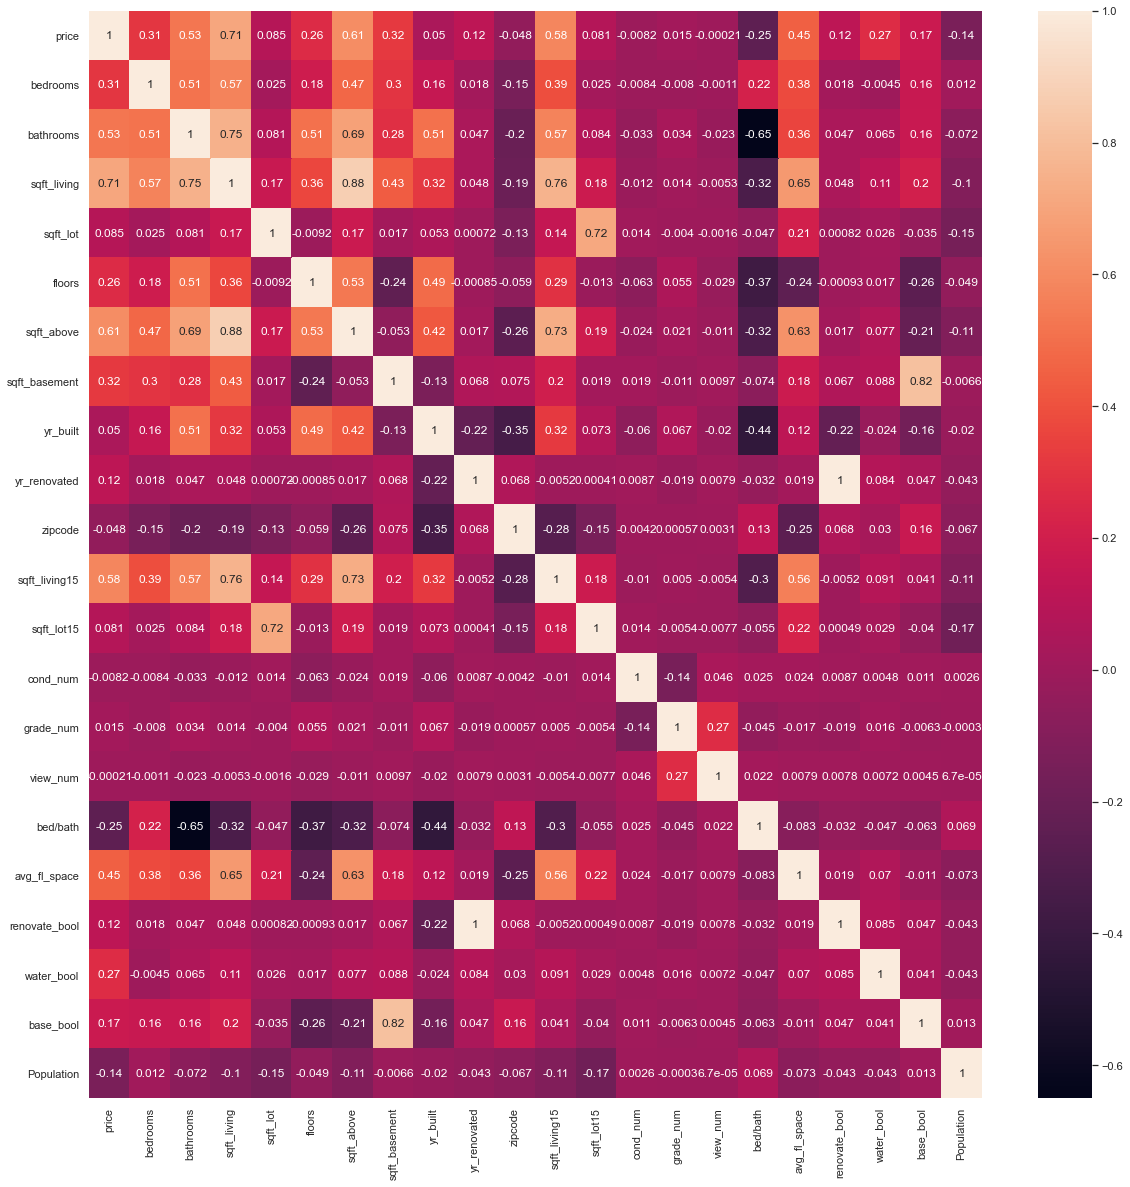

In [71]:
df_no = df.drop(columns=['waterfront','City'])
plt.figure(figsize = (20,20))
sns.heatmap(df_no.corr(), annot = True)

In [72]:
df.shape

(15390, 24)

In [74]:
df_zip.shape

(15025, 93)

In [102]:
import os
os.getcwd()

'/Users/Arsh/Flatiron'